In [1]:
#investigate potentially protective effect of rural residency on elderly population in counties with high and low ICU occupancy

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import altair as alt

from sklearn.cluster import KMeans

In [2]:
nyte = pd.read_csv('../Generated_Files/nyt_enriched.csv')
irr2010 = pd.read_csv('../Data/IRR_2010.csv')

In [3]:
irr_tuples = []
for row in irr2010.iterrows():
    irr_tuples.append((row[1]["County Name"].split(" County")[0], #remove 'County'
                       row[1]["State"].lstrip(), #remove leading whitespace
                       row[1]['IRR2010']))
irr_df=pd.DataFrame(irr_tuples,columns=['county','state','irr2010'])

In [4]:
irr_nyte_merged = pd.merge(irr_df,nyte,left_on=['county','state'],right_on=['County','State']).drop(['county_x','county_y','state_x','state_y'],axis=1)
irr_nyte_merged

,irr2010,State,County,Total Population,num_icu_be,bed_utiliz,potential,pco60,popOver60,percentOver60,popOver60perICU,date,fips,cases,deaths,days_since_first_case,deaths_per_capita,cases_per_capita,deaths_per_case
0,0.48,Alabama,Autauga,55036,6.0,0.623113,30,0.031870,10523,19.1,1754.0,2020-06-17,1001.0,375,7,85,0.000127,0.006814,0.018667
1,0.44,Alabama,Baldwin,203360,44.0,1.657949,24,0.005158,53519,26.3,1049.0,2020-06-17,1003.0,392,9,95,0.000044,0.001928,0.022959
2,0.53,Alabama,Barbour,26201,5.0,0.430640,44,0.046945,6150,23.5,1230.0,2020-06-17,1005.0,251,1,75,0.000038,0.009580,0.003984
3,0.49,Alabama,Blount,57667,6.0,0.499069,0,0.039312,13600,23.6,2267.0,2020-06-17,1009.0,123,1,84,0.000017,0.002133,0.008130
4,0.54,Alabama,Butler,20126,7.0,0.183251,28,0.036570,5151,25.6,736.0,2020-06-17,1013.0,554,25,84,0.001242,0.027527,0.045126
5,0.42,Alabama,Calhoun,115527,24.0,0.809041,73,0.009781,27115,23.5,1130.0,2020-06-17,1015.0,208,4,91,0.000035,0.001800,0.019231
6,0.50,Alabama,Chilton,43805,6.0,0.285458,4,0.035886,9429,21.5,1572.0,2020-06-17,1021.0,149,2,84,0.000046,0.003401,0.013423
7,0.55,Alabama,Clay,13407,4.0,0.291126,7,0.064891,3480,26.0,870.0,2020-06-17,1027.0,30,2,84,0.000149,0.002238,0.066667
8,0.49,Alabama,Coffee,51073,7.0,0.238052,32,0.030838,11027,21.6,1575.0,2020-06-17,1031.0,301,1,76,0.000020,0.005894,0.003322
9,0.47,Alabama,Colbert,54435,22.0,0.517603,63,0.011739,14062,25.8,639.0,2020-06-17,1033.0,283,5,84,0.000092,0.005199,0.017668


#### KMeans Clustering
Cluster without per capita stats, but include them after cluster assignments have been made

In [5]:
sample = irr_nyte_merged[['County','State','num_icu_be','irr2010','popOver60','deaths','Total Population']][irr_nyte_merged.num_icu_be<1000]

In [6]:
X = sample[['num_icu_be','irr2010','popOver60','deaths','Total Population']].values
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
sample.loc[:,'cluster'] = kmeans.labels_

Cluster centers can be viewed as prototypical couties in each cluster

In [7]:
pd.DataFrame(kmeans.cluster_centers_,
             columns=['num_icu_be','irr2010','popOver60','deaths','Total Population'])

,num_icu_be,irr2010,popOver60,deaths,Total Population
0,20.552048,0.470333,20568.277304,16.578498,9.199508e+04
1,426.100000,0.255500,408075.150000,666.500000,2.159981e+06
2,155.144928,0.275870,139721.608696,327.405797,7.011658e+05


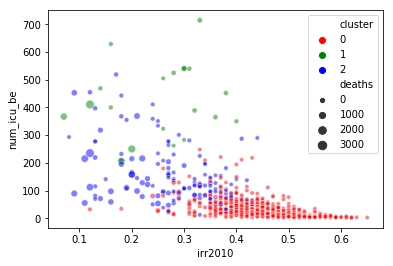

In [8]:
sns.scatterplot(x='irr2010',
                y='num_icu_be',
                size='deaths',
                hue='cluster',
                palette=['red','green','blue'],
                alpha=0.5,
                data=sample)

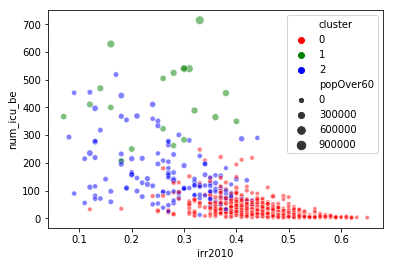

In [9]:
sns.scatterplot(x='irr2010',
                y='num_icu_be',
                size='popOver60',
                hue='cluster',
                palette=['red','green','blue'],
                alpha=0.5,
                data=sample)

In [10]:
sample[(sample.irr2010<0.3) & (sample.cluster==0)]

,County,State,num_icu_be,irr2010,popOver60,deaths,Total Population,cluster
224,Clarke,Georgia,92.0,0.28,17345,15,123554,0
225,Clayton,Georgia,34.0,0.18,36959,74,274150,0
241,Forsyth,Georgia,24.0,0.25,33215,13,211300,0
435,Wyandotte,Kansas,129.0,0.29,27635,76,163227,0
510,Howard,Maryland,16.0,0.28,57302,77,312495,0
519,Barnstable,Massachusetts,21.0,0.27,80676,133,213900,0
717,Gloucester,New Jersey,14.0,0.28,60833,166,291372,0
720,Mercer,New Jersey,80.0,0.24,75299,523,373362,0
727,Somerset,New Jersey,28.0,0.25,67698,438,333316,0
805,Durham,North Carolina,70.0,0.29,51648,59,300865,0


In [11]:
sample[(sample.irr2010>0.3) & (sample.cluster==1)]

,County,State,num_icu_be,irr2010,popOver60,deaths,Total Population,cluster
49,Maricopa,Arizona,715.0,0.33,808534,579,4155501,1
109,Riverside,California,365.0,0.36,437180,399,2355002,1
112,San Bernardino,California,350.0,0.40,330448,229,2121220,1
113,San Diego,California,540.0,0.31,604412,327,3283665,1
199,Palm Beach,Florida,389.0,0.32,414928,444,1426772,1
696,Clark,Nevada,452.0,0.38,405618,386,2112436,1


In [12]:
sample.to_csv('../Generated_Files/IRRClusteredSample.csv')

In [13]:
alt.Chart(sample).mark_point().encode(
    x='irr2010',
    y='num_icu_be',
    size='popOver60',
    tooltip=['County','State'],
    color='cluster'
)

alt.Chart(...)

In [14]:
alt.Chart(sample).mark_point().encode(
    x='irr2010',
    y='num_icu_be',
    size='deaths',
    tooltip=['County','State'],
    color='cluster'
)

alt.Chart(...)